In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-78.29112171367984 -114.23607180793302
-0.24751515360635779 60.56210988599969
18.614545153694294 9.523053910543837
-85.85650045477236 -130.20356489247405
15.039993638319501 106.08172112398148
72.75393375905921 -125.29414635992187
74.23447011433282 1.6214793771000302
-58.6809686783828 67.74973409326014
19.064336247979412 11.656933509708637
72.35885901985228 141.40680548295603
17.77686045006746 138.11519928862583
-83.72452781208345 -161.297095022849
9.204875222357629 -170.64016442763543
66.78170312006213 129.26930969003104
-71.70986737454922 -26.223829183983014
-79.340451794177 -91.07079619455966
19.859058796888263 66.03361818300954
-70.56150138908528 -95.98204407154071
-50.2662708657878 -47.49459050312507
67.95543428108869 -49.51505845772061
33.71989487788973 -97.68243025655048
85.53990603077409 -175.82260411646777
-21.20721358040538 51.5435591910564
48.074801838474656 51.218845087151834
30.704891605765624 66.11286720948121
-1.484025812301141 -173.49776380319145
-87.64944361874363 117.5

-57.13156195156362 113.05141105567486
45.79104082337847 -4.143485691459944
-89.91113602343296 -32.25557151987306
-48.51138001867613 -141.63150357751624
45.945074602398705 -28.017477946844878
-9.139305768347455 14.831303556154495
59.975215511187145 -46.09785674727627
14.098381241042546 -164.13563138991313
-1.623394289202892 -64.40835208155264
45.31281002091532 81.93488177325571
-50.150957936095715 -165.2605177302176
-68.03655333622373 -158.00732956267674
54.7275386418429 165.1156388657264
-73.46096737226337 85.04115794839595
4.044412007838147 31.98356928534585
5.638817591512634 -132.41768119591615
-23.81121613323205 130.05973257097844
-17.764730156790264 129.74238484620605
48.263772475804586 18.670486000392287
9.842388176642714 78.15993792158457
-10.830702988090707 -78.46739653843227
-84.3449607806462 67.65371357227627
88.77050181596758 52.09331657572247
62.579294250161496 -22.173086095192673
13.520701985477174 -152.75439784261795
20.606977358361107 35.1951497620048
60.137922631915444 -

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

575

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": current})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | punta arenas
City not found. Skipping...
Processing Record 2 of Set 12 | victoria
City not found. Skipping...
Processing Record 3 of Set 12 | arlit
City not found. Skipping...
Processing Record 4 of Set 12 | rikitea
City not found. Skipping...
Processing Record 5 of Set 12 | champasak
City not found. Skipping...
Processing Record 6 of Set 12 | norman wells
City not found. Skipping...
Processing Record 7 of Set 12 | roald
City not found. Skipping...
Processing Record 8 of Set 12 | saint-philippe
City not found. Skipping...
Processing Record 9 of Set 12 | bilma
City not found. Skipping...
Processing Record 10 of Set 12 | deputatskiy
City not found. Skipping...
Processing Record 11 of Set 12 | airai
City not found. Skipping...
Processing Record 12 of Set 12 | mataura
City not found. Skipping...
Processing Record 13 of Set 12 | kapaa
City not found. Skipping...
Processing Record 14 of Set 12 | batag

City not found. Skipping...
Processing Record 18 of Set 14 | longyearbyen
City not found. Skipping...
Processing Record 19 of Set 14 | shancheng
City not found. Skipping...
Processing Record 20 of Set 14 | slave lake
City not found. Skipping...
Processing Record 21 of Set 14 | talnakh
City not found. Skipping...
Processing Record 22 of Set 14 | tuatapere
City not found. Skipping...
Processing Record 23 of Set 14 | chokurdakh
City not found. Skipping...
Processing Record 24 of Set 14 | hithadhoo
City not found. Skipping...
Processing Record 25 of Set 14 | clyde river
City not found. Skipping...
Processing Record 26 of Set 14 | muroto
City not found. Skipping...
Processing Record 27 of Set 14 | muriti
City not found. Skipping...
Processing Record 28 of Set 14 | nouakchott
City not found. Skipping...
Processing Record 29 of Set 14 | fortuna
City not found. Skipping...
Processing Record 30 of Set 14 | vila franca do campo
City not found. Skipping...
Processing Record 31 of Set 14 | lompoc


City not found. Skipping...
Processing Record 37 of Set 16 | pemba
City not found. Skipping...
Processing Record 38 of Set 16 | collie
City not found. Skipping...
Processing Record 39 of Set 16 | mezen
City not found. Skipping...
Processing Record 40 of Set 16 | senador jose porfirio
City not found. Skipping...
Processing Record 41 of Set 16 | kahramanmaras
City not found. Skipping...
Processing Record 42 of Set 16 | kerema
City not found. Skipping...
Processing Record 43 of Set 16 | helong
City not found. Skipping...
Processing Record 44 of Set 16 | novopavlovka
City not found. Skipping...
Processing Record 45 of Set 16 | kongoussi
City not found. Skipping...
Processing Record 46 of Set 16 | komsomolskiy
City not found. Skipping...
Processing Record 47 of Set 16 | severo-kurilsk
City not found. Skipping...
Processing Record 48 of Set 16 | grants
City not found. Skipping...
Processing Record 49 of Set 16 | nhulunbuy
City not found. Skipping...
Processing Record 50 of Set 16 | guerrero 

City not found. Skipping...
Processing Record 4 of Set 19 | maniitsoq
City not found. Skipping...
Processing Record 5 of Set 19 | zeerust
City not found. Skipping...
Processing Record 6 of Set 19 | hirara
City not found. Skipping...
Processing Record 7 of Set 19 | northam
City not found. Skipping...
Processing Record 8 of Set 19 | lake city
City not found. Skipping...
Processing Record 9 of Set 19 | atar
City not found. Skipping...
Processing Record 10 of Set 19 | litoral del san juan
City not found. Skipping...
Processing Record 11 of Set 19 | saint-augustin
City not found. Skipping...
Processing Record 12 of Set 19 | yar-sale
City not found. Skipping...
Processing Record 13 of Set 19 | bahir dar
City not found. Skipping...
Processing Record 14 of Set 19 | beloha
City not found. Skipping...
Processing Record 15 of Set 19 | cockburn harbour
City not found. Skipping...
Processing Record 16 of Set 19 | manggar
City not found. Skipping...
Processing Record 17 of Set 19 | tocopilla
City no

City not found. Skipping...
Processing Record 21 of Set 21 | demyansk
City not found. Skipping...
Processing Record 22 of Set 21 | itoman
City not found. Skipping...
Processing Record 23 of Set 21 | sola
City not found. Skipping...
Processing Record 24 of Set 21 | barra do garcas
City not found. Skipping...
Processing Record 25 of Set 21 | barkot
City not found. Skipping...
Processing Record 26 of Set 21 | batavia
City not found. Skipping...
Processing Record 27 of Set 21 | san pedro
City not found. Skipping...
Processing Record 28 of Set 21 | ixtapa
City not found. Skipping...
Processing Record 29 of Set 21 | dale
City not found. Skipping...
Processing Record 30 of Set 21 | wagar
City not found. Skipping...
Processing Record 31 of Set 21 | tanout
City not found. Skipping...
Processing Record 32 of Set 21 | hobyo
City not found. Skipping...
Processing Record 33 of Set 21 | alyangula
City not found. Skipping...
Processing Record 34 of Set 21 | baraboo
City not found. Skipping...
Process

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [13]:
#change the column order

new_column_order =[ "City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Yeniseyskiy,RU,2022-05-21 16:22:41,60.3725,93.0408,41.79,85,97,8.39
1,San Cristobal,VE,2022-05-21 16:22:41,7.7669,-72.2250,73.58,40,15,10.16
2,Namibe,AO,2022-05-21 16:22:41,-15.1961,12.1522,77.63,47,0,13.80
3,Wajima,JP,2022-05-21 16:22:41,37.4000,136.9000,61.70,79,95,9.57
4,Kahului,US,2022-05-21 16:20:59,20.8947,-156.4700,76.84,83,0,0.00
5,Ushuaia,AR,2022-05-21 16:22:42,-54.8000,-68.3000,42.46,70,75,16.11
6,Port Alfred,ZA,2022-05-21 16:22:42,-33.5906,26.8910,59.18,88,78,1.99
7,Yar-Sale,RU,2022-05-21 16:22:42,66.8333,70.8333,32.29,79,68,15.88
8,Kapaa,US,2022-05-21 16:22:42,22.0752,-159.3190,75.18,99,100,3.44
9,Guayaramerin,BO,2022-05-21 16:22:43,-10.8368,-65.3614,84.25,48,0,5.75


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


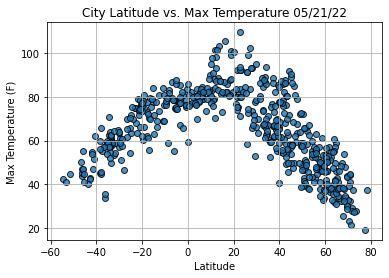

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

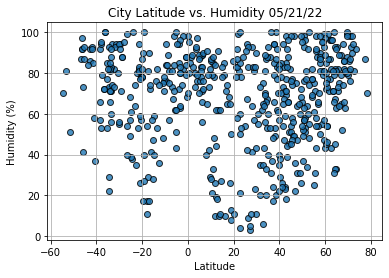

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


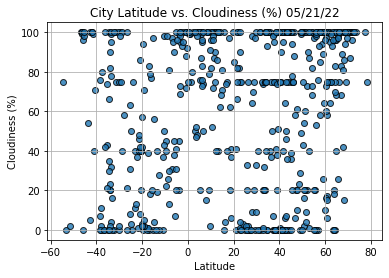

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

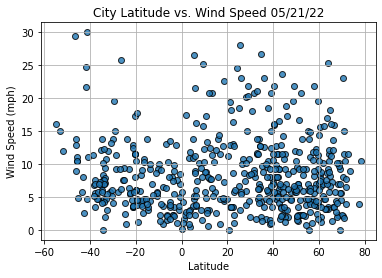

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                     Tasiilaq
Country                        GL
Date          2022-05-21 16:22:43
Lat                       65.6145
Lng                      -37.6368
Max Temp                    41.16
Humidity                       71
Cloudiness                     26
Wind Speed                   1.36
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Yeniseyskiy,RU,2022-05-21 16:22:41,60.3725,93.0408,41.79,85,97,8.39
1,San Cristobal,VE,2022-05-21 16:22:41,7.7669,-72.2250,73.58,40,15,10.16
3,Wajima,JP,2022-05-21 16:22:41,37.4000,136.9000,61.70,79,95,9.57
4,Kahului,US,2022-05-21 16:20:59,20.8947,-156.4700,76.84,83,0,0.00
7,Yar-Sale,RU,2022-05-21 16:22:42,66.8333,70.8333,32.29,79,68,15.88
...,...,...,...,...,...,...,...,...,...
538,Poronaysk,RU,2022-05-21 16:35:51,49.2167,143.1167,38.73,98,100,6.67
539,Dalian,CN,2022-05-21 16:35:52,38.9122,121.6022,66.61,77,38,6.71
540,San Quintin,MX,2022-05-21 16:35:52,30.4833,-115.9500,63.46,60,40,8.41
541,Pundaguitan,PH,2022-05-21 16:35:52,6.3711,126.1689,82.44,76,100,5.21


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Yeniseyskiy,RU,2022-05-21 16:22:41,60.3725,93.0408,41.79,85,97,8.39
1,San Cristobal,VE,2022-05-21 16:22:41,7.7669,-72.2250,73.58,40,15,10.16
3,Wajima,JP,2022-05-21 16:22:41,37.4000,136.9000,61.70,79,95,9.57
4,Kahului,US,2022-05-21 16:20:59,20.8947,-156.4700,76.84,83,0,0.00
7,Yar-Sale,RU,2022-05-21 16:22:42,66.8333,70.8333,32.29,79,68,15.88


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

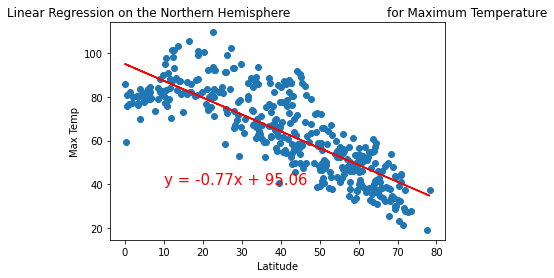

In [25]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

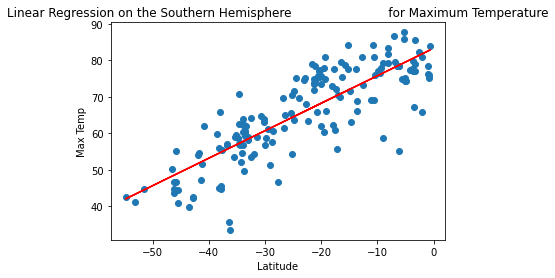

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

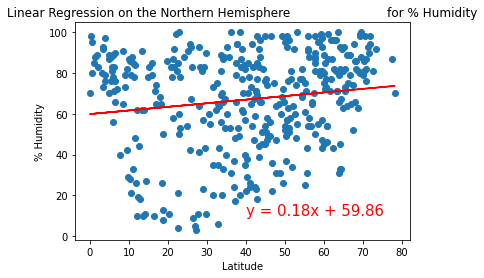

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

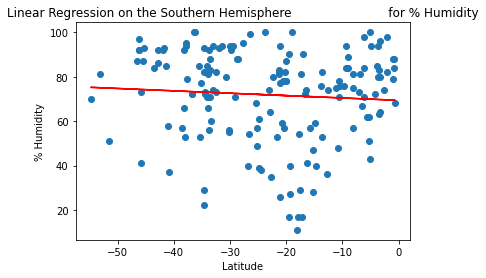

In [28]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

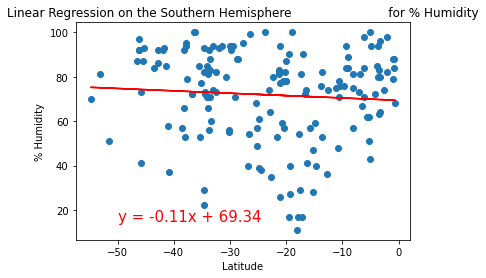

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

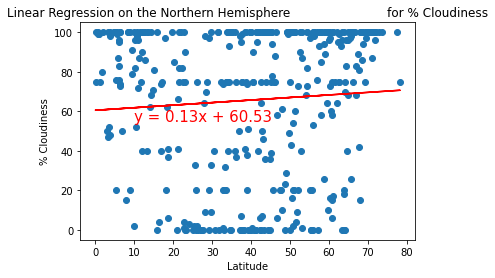

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

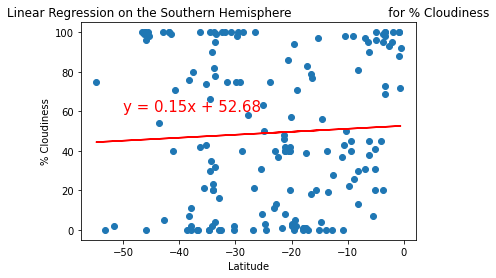

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

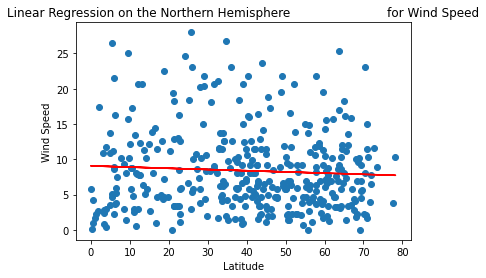

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

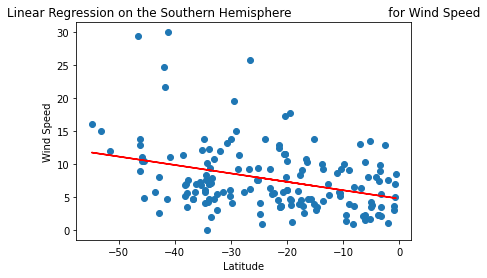

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))